### import packages

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

### import dataset

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


### fraud_reported is our target variable. Rest all are feature columns

In [3]:
df=df.drop(['_c39'],axis=1)

In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (1000, 39)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### there is missing data in the form of '?' as a datapoint in few columns lets check

In [7]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

collision_type
178
property_damage
360
police_report_available
343


### above columns have missing values, analyze the  dataset and fill it accordingly using mode and logical reasoning

In [8]:
df[['collision_type','property_damage','police_report_available']]

,collision_type,property_damage,police_report_available
0,Side Collision,YES,YES
1,?,?,?
2,Rear Collision,NO,NO
3,Front Collision,?,NO
4,?,NO,NO
...,...,...,...
995,Front Collision,YES,?
996,Rear Collision,YES,?
997,Side Collision,?,YES
998,Rear Collision,?,YES


### start analyzes to determine how to fill null values

### miss in property damage

In [9]:
df[df['property_damage']!='?']['property_damage'].mode()

0    NO
dtype: object

In [10]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
df[df['property_damage']=='?']['incident_severity'].value_counts()

Major Damage      115
Minor Damage      110
Total Loss         97
Trivial Damage     38
Name: incident_severity, dtype: int64

In [12]:
df[df['incident_severity']=='Major Damage']['property_damage'].value_counts()

?      115
YES     87
NO      74
Name: property_damage, dtype: int64

In [13]:
df[df['incident_severity']=='Minor Damage']['property_damage'].value_counts()

NO     135
?      110
YES    109
Name: property_damage, dtype: int64

In [14]:
df[df['incident_severity']=='Trivial Damage']['property_damage'].value_counts()

?      38
NO     31
YES    21
Name: property_damage, dtype: int64

In [15]:
df[df['incident_severity']=='Total Loss']['property_damage'].value_counts()

NO     98
?      97
YES    85
Name: property_damage, dtype: int64

In [16]:
df[df['incident_severity']=='Total Loss']['incident_type'].value_counts()

Multi-vehicle Collision     145
Single Vehicle Collision    135
Name: incident_type, dtype: int64

In [17]:
df[df['incident_type']=='Multi-vehicle Collision']['property_damage'].value_counts()

?      152
NO     144
YES    123
Name: property_damage, dtype: int64

In [18]:
df[df['incident_type']=='Single Vehicle Collision']['property_damage'].value_counts()

?      145
YES    129
NO     129
Name: property_damage, dtype: int64

### conclusion on how to fill the miss values of property damage
#### if incident_severity is major damage fill property damage yes else no

### miss in police report

In [19]:
df[df['police_report_available']!='?']['police_report_available'].mode()

0    NO
dtype: object

In [20]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

### using logical reasoning and above analyzes it is always better to assume police report as no rather than yes. Hence fill missing as No

### miss in collision type

In [21]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [22]:
df[df['collision_type']=='?']['incident_type'].value_counts()

Vehicle Theft    94
Parked Car       84
Name: incident_type, dtype: int64

In [23]:
df[df['incident_type']=='Vehicle Theft']['incident_severity'].value_counts()

Trivial Damage    48
Minor Damage      46
Name: incident_severity, dtype: int64

In [24]:
df[df['incident_type']=='Parked Car']['incident_severity'].value_counts()

Minor Damage      42
Trivial Damage    42
Name: incident_severity, dtype: int64

In [25]:
df[df['incident_severity']=='Minor Damage']['collision_type'].value_counts()

Rear Collision     100
?                   88
Side Collision      85
Front Collision     81
Name: collision_type, dtype: int64

In [26]:
df[df['incident_severity']=='Trivial Damage']['collision_type'].value_counts()

?    90
Name: collision_type, dtype: int64

In [27]:
df[df['collision_type']!='?']['collision_type'].mode()

0    Rear Collision
dtype: object

In [28]:
df['police_report_available'].mode()[1]

'NO'

### from above analyzes we need to replace missing values as Rear Collision

### fill missing values

In [29]:
fill=df['police_report_available'].mode()[1]
for i in range(len(df['police_report_available'])):
    if df['police_report_available'][i]=='?':
        df['police_report_available'][i]=fill

In [30]:
fill=df['collision_type'].mode()[0]
for i in range(len(df['collision_type'])):
    if df['collision_type'][i]=='?':
        df['collision_type'][i]=fill

In [31]:
for i in range(len(df['property_damage'])):
    if df['property_damage'][i]=='?':
        if df['incident_severity'][i]=='Major Damage':
            df['property_damage'][i]='YES'
        else:
            df['property_damage'][i]='NO' 

### missing values filled

### conv categorical data into numerical data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, property_damage, police_report_available, auto_make, auto_model, fraud_reported
### above are the names of columns which are required to numerical values

In [33]:
dicty={}
for i in df[['policy_state']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'policy_state': {'OH': 0, 'IN': 1, 'IL': 2}}

In [34]:
for i in ['policy_state']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [35]:
dicty={}
for i in df[['policy_csl']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'policy_csl': {'250/500': 0, '100/300': 1, '500/1000': 2}}

In [36]:
for i in ['policy_csl']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [37]:
dicty={}
for i in df[['insured_sex']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'insured_sex': {'MALE': 0, 'FEMALE': 1}}

In [38]:
for i in ['insured_sex']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [39]:
dicty={}
for i in df[['insured_education_level']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'insured_education_level': {'MD': 0,
  'PhD': 1,
  'Associate': 2,
  'Masters': 3,
  'High School': 4,
  'College': 5,
  'JD': 6}}

In [40]:
for i in ['insured_education_level']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [41]:
dicty={}
for i in df[['insured_occupation']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'insured_occupation': {'craft-repair': 0,
  'machine-op-inspct': 1,
  'sales': 2,
  'armed-forces': 3,
  'tech-support': 4,
  'prof-specialty': 5,
  'other-service': 6,
  'priv-house-serv': 7,
  'exec-managerial': 8,
  'protective-serv': 9,
  'transport-moving': 10,
  'handlers-cleaners': 11,
  'adm-clerical': 12,
  'farming-fishing': 13}}

In [42]:
for i in ['insured_occupation']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [43]:
dicty={}
for i in df[['insured_hobbies']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'insured_hobbies': {'sleeping': 0,
  'reading': 1,
  'board-games': 2,
  'bungie-jumping': 3,
  'base-jumping': 4,
  'golf': 5,
  'camping': 6,
  'dancing': 7,
  'skydiving': 8,
  'movies': 9,
  'hiking': 10,
  'yachting': 11,
  'paintball': 12,
  'chess': 13,
  'kayaking': 14,
  'polo': 15,
  'basketball': 16,
  'video-games': 17,
  'cross-fit': 18,
  'exercise': 19}}

In [44]:
for i in ['insured_hobbies']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [45]:
dicty={}
for i in df[['insured_relationship']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'insured_relationship': {'husband': 0,
  'other-relative': 1,
  'own-child': 2,
  'unmarried': 3,
  'wife': 4,
  'not-in-family': 5}}

In [46]:
for i in ['insured_relationship']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [47]:
dicty={}
for i in df[['incident_type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'incident_type': {'Single Vehicle Collision': 0,
  'Vehicle Theft': 1,
  'Multi-vehicle Collision': 2,
  'Parked Car': 3}}

In [48]:
for i in ['incident_type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [49]:
dicty={}
for i in df[['collision_type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'collision_type': {'Side Collision': 0,
  'Rear Collision': 1,
  'Front Collision': 2}}

In [50]:
for i in ['collision_type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [51]:
dicty={}
for i in df[['incident_severity']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'incident_severity': {'Major Damage': 0,
  'Minor Damage': 1,
  'Total Loss': 2,
  'Trivial Damage': 3}}

In [52]:
for i in ['incident_severity']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [53]:
dicty={}
for i in df[['authorities_contacted']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'authorities_contacted': {'Police': 0,
  'None': 1,
  'Fire': 2,
  'Other': 3,
  'Ambulance': 4}}

In [54]:
for i in ['authorities_contacted']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [55]:
dicty={}
for i in df[['incident_state']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'incident_state': {'SC': 0,
  'VA': 1,
  'NY': 2,
  'OH': 3,
  'WV': 4,
  'NC': 5,
  'PA': 6}}

In [56]:
for i in ['incident_state']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [57]:
dicty={}
for i in df[['incident_city']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'incident_city': {'Columbus': 0,
  'Riverwood': 1,
  'Arlington': 2,
  'Springfield': 3,
  'Hillsdale': 4,
  'Northbend': 5,
  'Northbrook': 6}}

In [58]:
for i in ['incident_city']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [59]:
dicty={}
for i in df[['property_damage']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'property_damage': {'YES': 0, 'NO': 1}}

In [60]:
for i in ['property_damage']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [61]:
dicty={}
for i in df[['police_report_available']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'police_report_available': {'YES': 0, 'NO': 1}}

In [62]:
for i in ['police_report_available']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [63]:
dicty={}
for i in df[['auto_make']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'auto_make': {'Saab': 0,
  'Mercedes': 1,
  'Dodge': 2,
  'Chevrolet': 3,
  'Accura': 4,
  'Nissan': 5,
  'Audi': 6,
  'Toyota': 7,
  'Ford': 8,
  'Suburu': 9,
  'BMW': 10,
  'Jeep': 11,
  'Honda': 12,
  'Volkswagen': 13}}

In [64]:
for i in ['auto_make']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [65]:
dicty={}
for i in df[['auto_model']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'auto_model': {'92x': 0,
  'E400': 1,
  'RAM': 2,
  'Tahoe': 3,
  'RSX': 4,
  '95': 5,
  'Pathfinder': 6,
  'A5': 7,
  'Camry': 8,
  'F150': 9,
  'A3': 10,
  'Highlander': 11,
  'Neon': 12,
  'MDX': 13,
  'Maxima': 14,
  'Legacy': 15,
  'TL': 16,
  'Impreza': 17,
  'Forrestor': 18,
  'Escape': 19,
  'Corolla': 20,
  '3 Series': 21,
  'C300': 22,
  'Wrangler': 23,
  'M5': 24,
  'X5': 25,
  'Civic': 26,
  'Passat': 27,
  'Silverado': 28,
  'CRV': 29,
  '93': 30,
  'Accord': 31,
  'X6': 32,
  'Malibu': 33,
  'Fusion': 34,
  'Jetta': 35,
  'ML350': 36,
  'Ultima': 37,
  'Grand Cherokee': 38}}

In [66]:
for i in ['auto_model']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [67]:
dicty={}
for i in df[['fraud_reported']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'fraud_reported': {'Y': 0, 'N': 1}}

In [68]:
for i in ['fraud_reported']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

### conv policy_bind_date date column to datapoints containing year only
### conv incident_date column to month data (as all incidents occured in same year 2015)

In [69]:
for i in range(len(df.policy_bind_date)):
    df.policy_bind_date[i]=int(df.policy_bind_date[i][-4:])
df = df.astype({'policy_bind_date': np.int64})

In [70]:
for i in range(len(df.incident_date)):
    df.incident_date[i]=int(df.incident_date[i][2:5])
df = df.astype({'incident_date': np.int64})

### based logical reasoning drop the following columns:
#### policy_number: unique for everyone
#### insured_hobbies: misc data
#### incident_location: incident state and city are already provided no need for specifics to determine fraud claims
#### auto_model: we already have auto brand

In [71]:
df=df.drop(['policy_number','insured_hobbies','incident_location','auto_model'],axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   int64  
 3   policy_state                 1000 non-null   int64  
 4   policy_csl                   1000 non-null   int64  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   int64  
 11  insured_occupation           1000 non-null   int64  
 12  insured_relationship         1000 non-null   int64  
 13  capital-gains      

### from above we know that only column policy_annual_premium is of float datatype rest all are int

### now use describe func and analyze dataset

In [73]:
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,2001.604000,0.98600,0.949000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.537000,...,0.992000,1.487000,0.686000,52761.94000,7433.420000,7399.570000,37928.950000,6.316000,2005.103000,0.753000
std,115.113174,9.140287,7.360391,0.83096,0.805635,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,3.994008,6.015861,0.431483
min,0.000000,19.000000,1990.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,1995.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,1.000000
50%,199.500000,38.000000,2002.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,1.000000,...,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,6.000000,2005.000000,1.000000
75%,276.250000,44.000000,2008.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,2010.000000,1.000000
max,479.000000,64.000000,2015.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,2015.000000,1.000000


### check data imbalancement and balance if required

In [74]:
print('Number of fraud_reported status yes are:',df['fraud_reported'].value_counts()[0])
print('Number of fraud_reported status no are:',df['fraud_reported'].value_counts()[1])
print('Unbalanced dataset' if df['fraud_reported'].value_counts()[0]!=df['fraud_reported'].value_counts()[1] else 'Balanced dataset')

Number of fraud_reported status yes are: 247
Number of fraud_reported status no are: 753
Unbalanced dataset


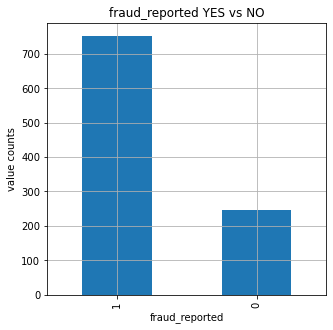

In [75]:
plt.figure(figsize=[5,5])
df['fraud_reported'].value_counts().plot(kind='bar')
plt.xlabel("fraud_reported")
plt.ylabel('value counts')
plt.title('fraud_reported YES vs NO')
plt.grid()

In [76]:
dfmin=df[df['fraud_reported']==0]
dfmax=df[df['fraud_reported']==1]
dfminup=resample(dfmin,replace=True,n_samples=753,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of fraud_reported status yes are:',dff['fraud_reported'].value_counts()[0])
print('Number of fraud_reported status no are:',dff['fraud_reported'].value_counts()[1])
print('Unbalanced dataset' if dff['fraud_reported'].value_counts()[0]!=dff['fraud_reported'].value_counts()[1] else 'Balanced dataset')

Number of fraud_reported status yes are: 753
Number of fraud_reported status no are: 753
Balanced dataset


### start analyzing to find correlation and the columns to drop

In [77]:
dff.corr()['fraud_reported']

months_as_customer            -0.013055
age                            0.000727
policy_bind_date               0.002562
policy_state                   0.087555
policy_csl                     0.047266
policy_deductable             -0.005973
policy_annual_premium          0.015835
umbrella_limit                -0.048799
insured_zip                   -0.021682
insured_sex                    0.029274
insured_education_level       -0.010206
insured_occupation             0.015820
insured_relationship          -0.007072
capital-gains                  0.016810
capital-loss                  -0.008096
incident_date                 -0.008714
incident_type                  0.078956
collision_type                -0.009897
incident_severity              0.465231
authorities_contacted         -0.113076
incident_state                 0.028487
incident_city                  0.046959
incident_hour_of_the_day      -0.025306
number_of_vehicles_involved   -0.059804
property_damage                0.240679


### use heatmap to check correlation on dataset

<AxesSubplot:>

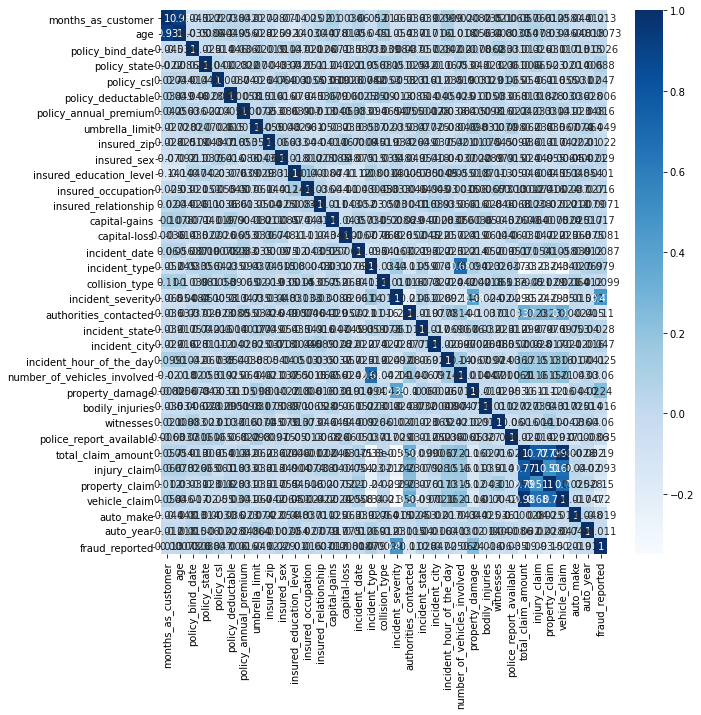

In [78]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

### check the graphical relation between fraud_reported column and rest

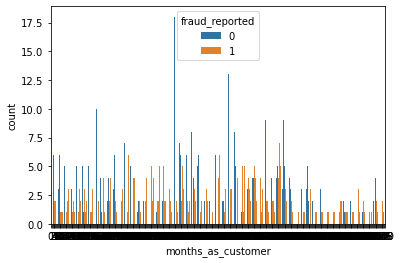

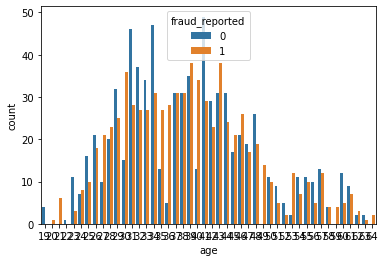

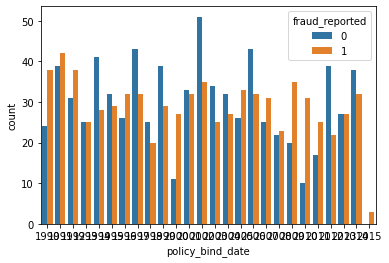

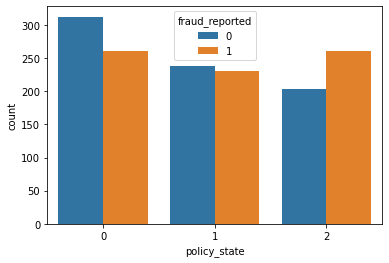

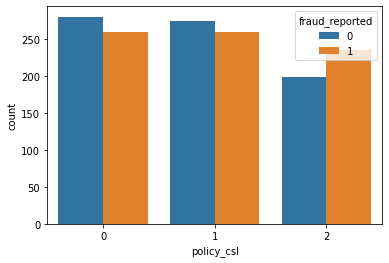

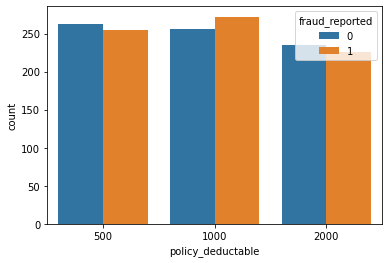

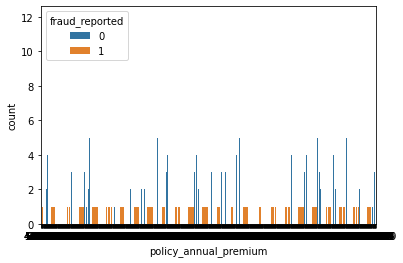

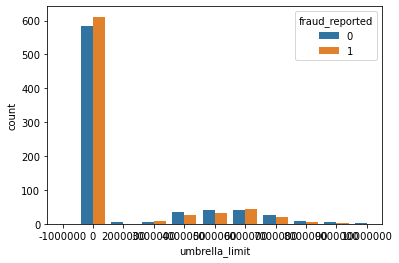

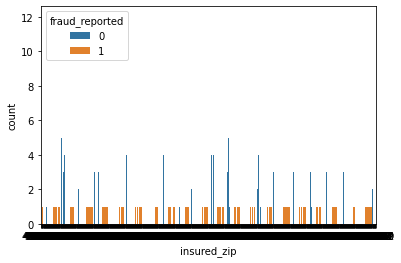

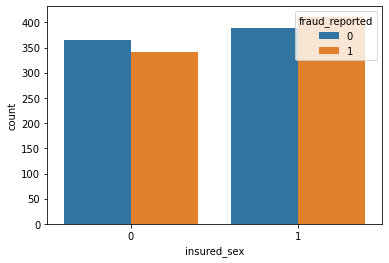

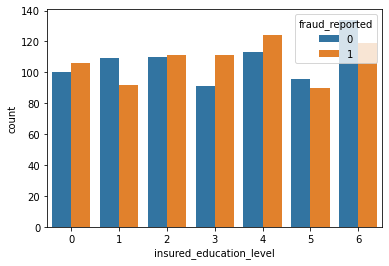

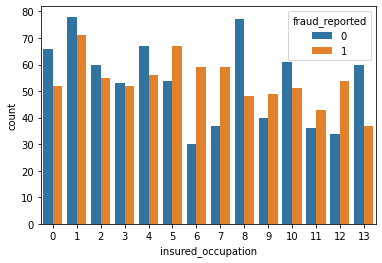

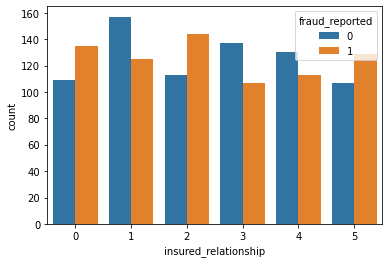

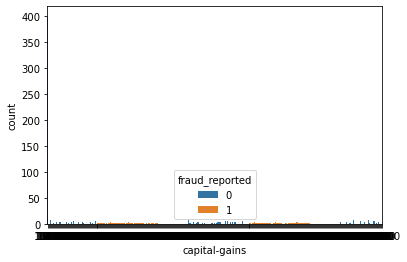

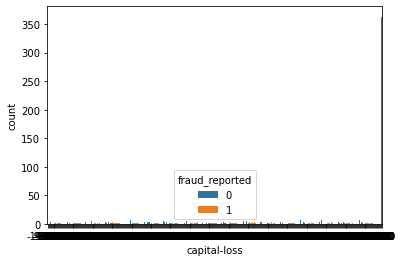

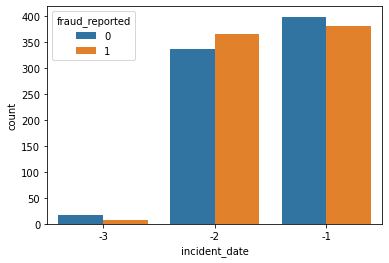

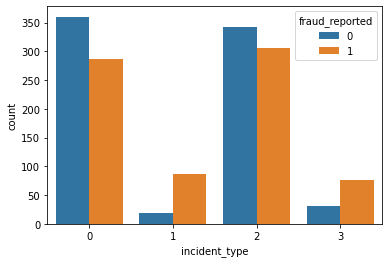

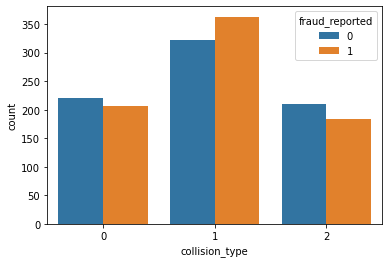

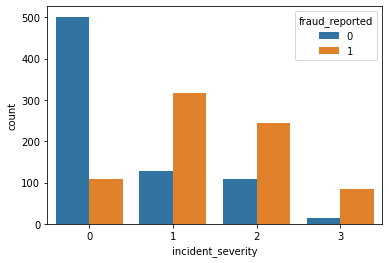

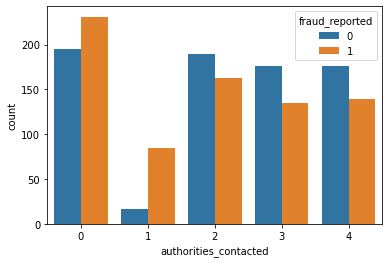

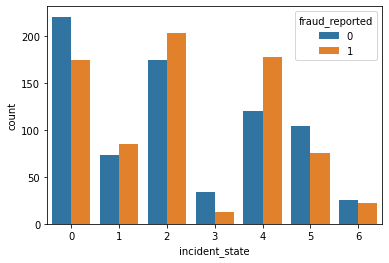

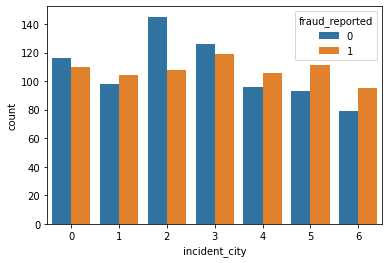

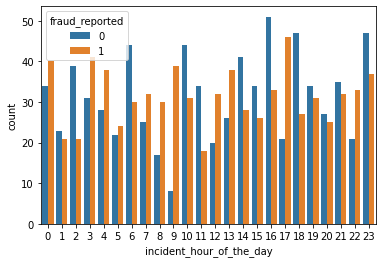

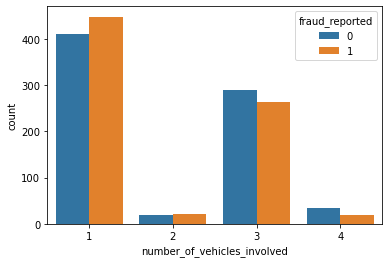

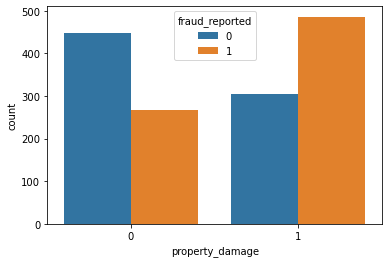

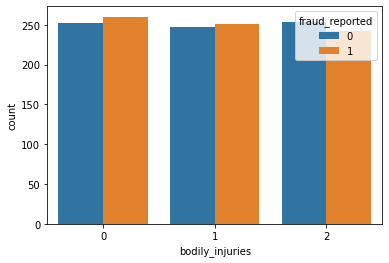

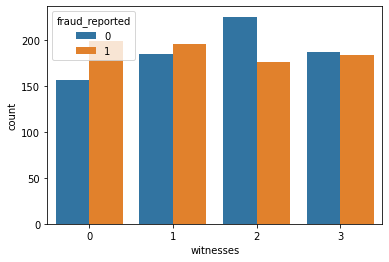

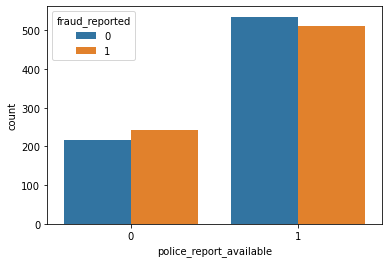

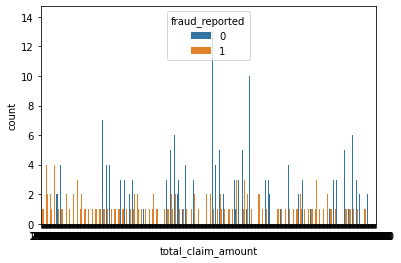

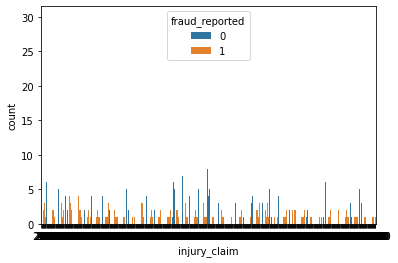

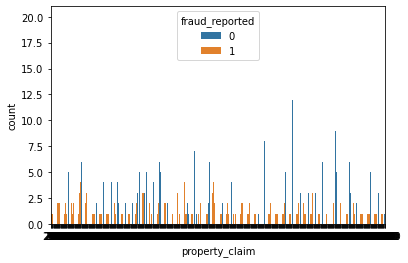

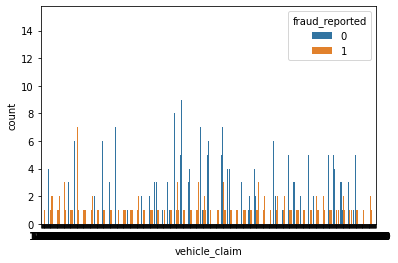

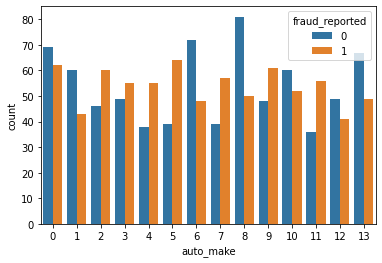

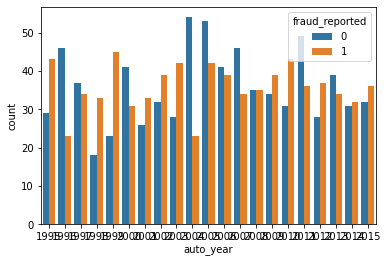

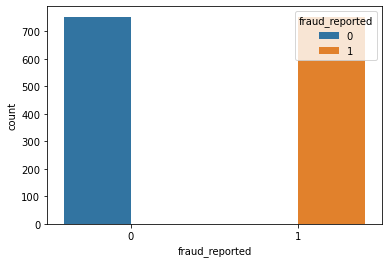

In [79]:
for i in dff.columns:
    sn.countplot(x=i,hue="fraud_reported",data=dff)
    plt.show()

### Acc to above plot policy dectuable, umbrella limit,insured sex, incident date, number of vehicles involved, bodily injuries, police report available columns are unable to distinguish between attrition yes and no. Meaning it does not provide much impact to the model. drop columns
### acc to correlation columns such as age, policy bind date,insured_relationship, capital-loss, collision_type have very low correlation to target variable
### drop all columns I have mentioned 

In [80]:
dff=dff.drop(['age','policy_bind_date','policy_deductable','umbrella_limit','insured_sex','insured_relationship',
              'capital-loss','incident_date','collision_type','number_of_vehicles_involved','bodily_injuries',
             'police_report_available'],axis=1)

### check dist plots of all columns

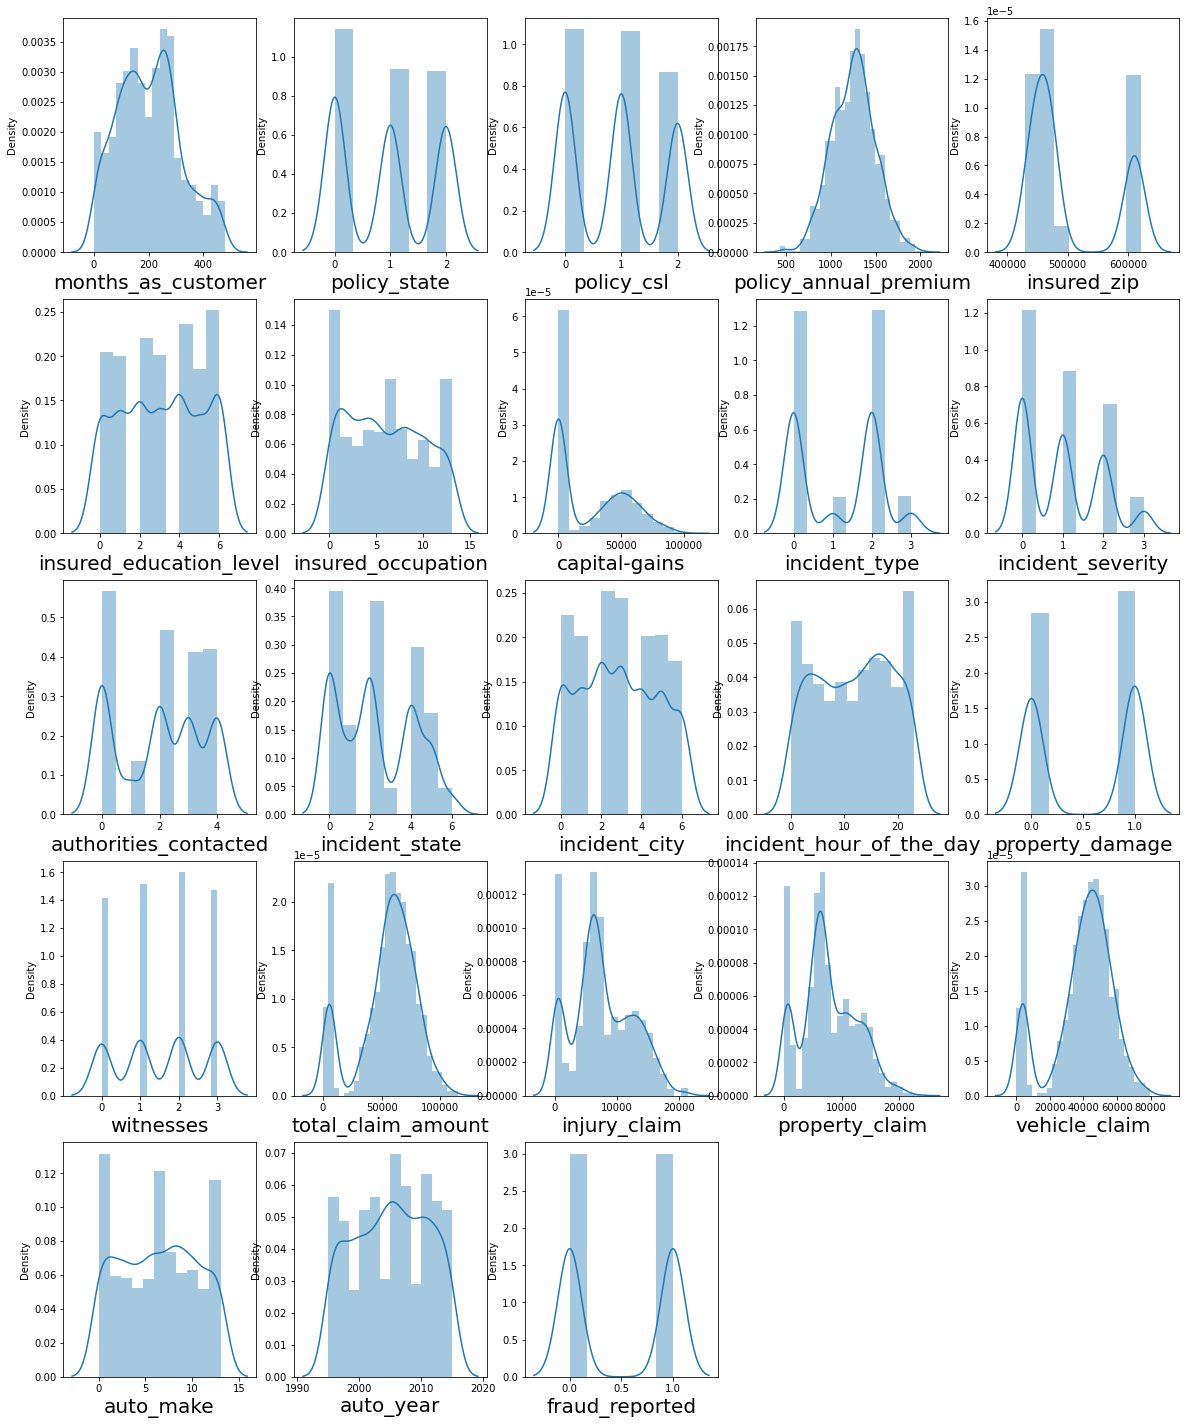

In [81]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(5,5,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### columns having rectangular distribution plot: auto_year, auto_make, incident_hour_of_the_day, incident_city, insured_occupation, insured_education_level, insured_zip, 

### columns having bimodal distribution plot: vehicle_claim, property_claim, injury_claim, total_claim_amount, witnesses, property_damage, incident_state, authorities_contacted, incident_severity, incident_type, capital-gains, policy_csl, policy_state, months_as_customer 

### columns having normal distribution plot: policy_annual_premium

### check for outliers

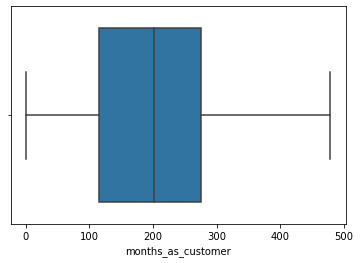

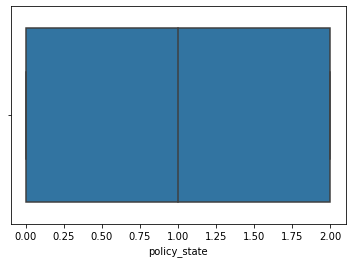

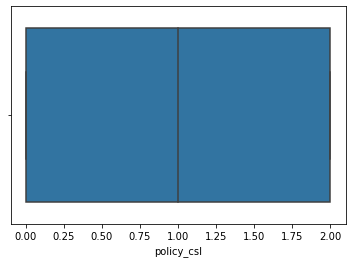

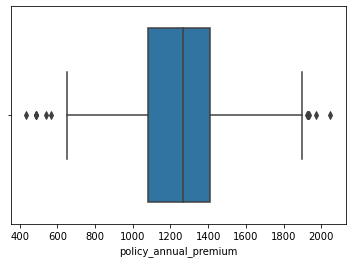

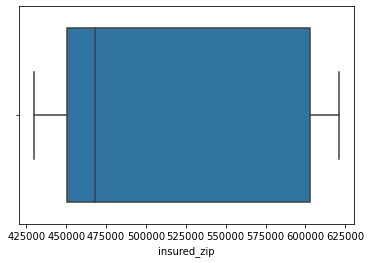

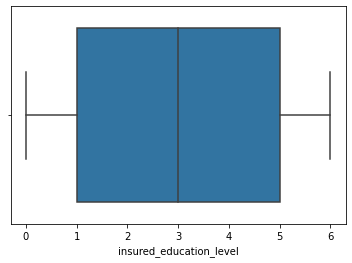

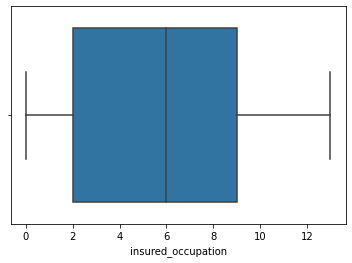

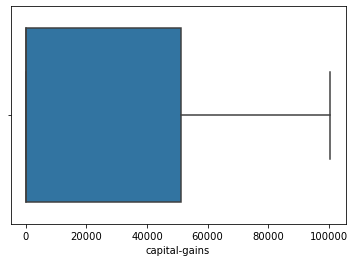

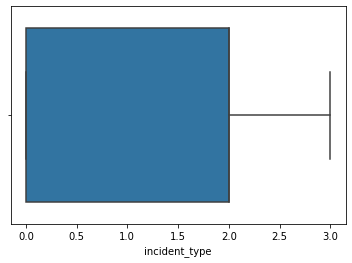

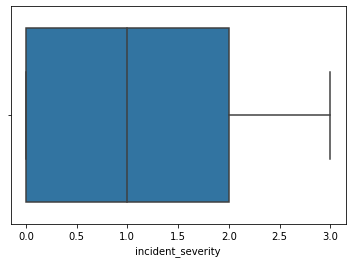

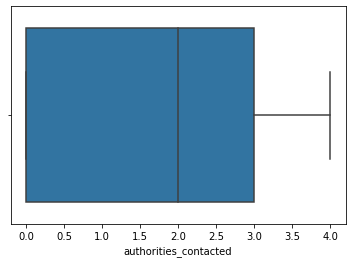

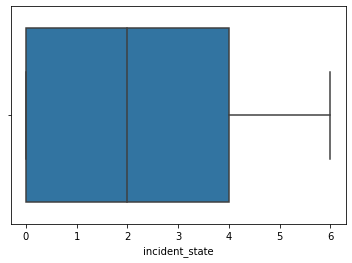

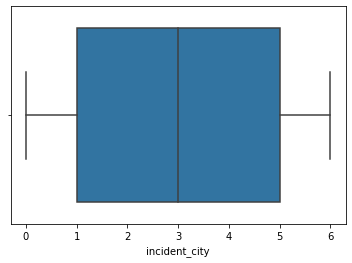

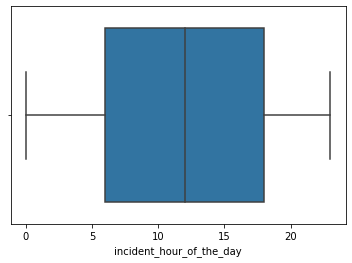

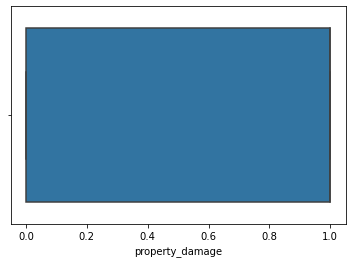

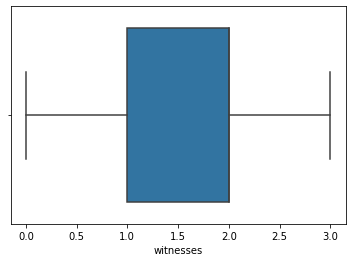

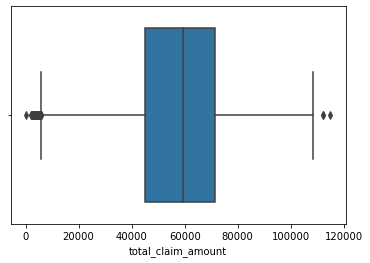

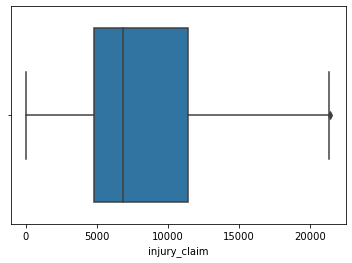

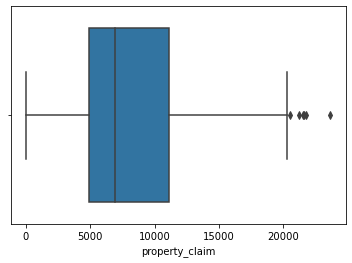

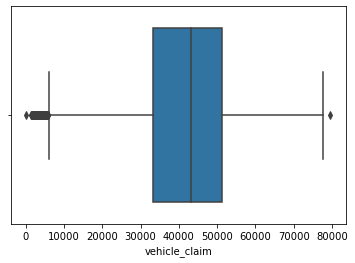

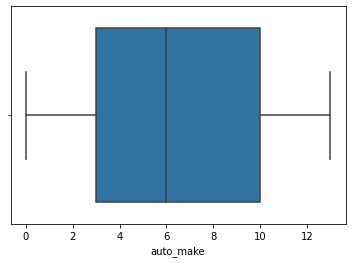

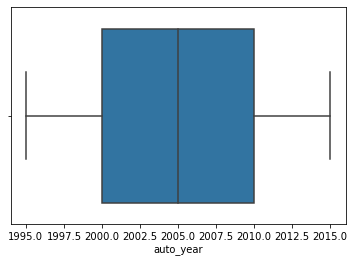

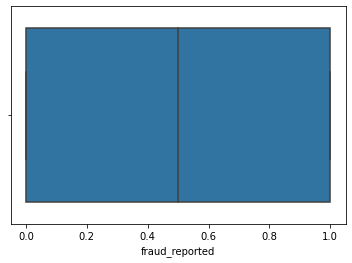

In [82]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

### All the categorical /non categorical type column have valid outliers as they are Natural Variation of datapoints, hence no need to remove outliers.

### if it was incorrect data entry then outliers were needed to removed

### seperate target variable and features

In [83]:
y = dff[['fraud_reported']].values
x = dff.drop(columns = ['fraud_reported'])

### check for bias and remove if possible

In [84]:
print(x.skew())

months_as_customer          0.305292
policy_state                0.135344
policy_csl                  0.126206
policy_annual_premium       0.006371
insured_zip                 0.820201
insured_education_level    -0.031253
insured_occupation          0.143196
capital-gains               0.534964
incident_type               0.070357
incident_severity           0.539913
authorities_contacted      -0.117101
incident_state              0.262192
incident_city               0.077725
incident_hour_of_the_day   -0.072581
property_damage            -0.101159
witnesses                  -0.033256
total_claim_amount         -0.722000
injury_claim                0.282559
property_claim              0.344947
vehicle_claim              -0.769609
auto_make                  -0.002623
auto_year                  -0.062585
dtype: float64


In [85]:
print(len(x.skew().loc[x.skew()>0.55]))

1


In [86]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [87]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

months_as_customer          0.305292
policy_state                0.135344
policy_csl                  0.126206
policy_annual_premium       0.006371
insured_zip                 0.797847
insured_education_level    -0.031253
insured_occupation          0.143196
capital-gains               0.534964
incident_type               0.070357
incident_severity           0.539913
authorities_contacted      -0.117101
incident_state              0.262192
incident_city               0.077725
incident_hour_of_the_day   -0.072581
property_damage            -0.101159
witnesses                  -0.033256
total_claim_amount         -0.722000
injury_claim                0.282559
property_claim              0.344947
vehicle_claim              -0.769609
auto_make                  -0.002623
auto_year                  -0.062585
dtype: float64

1


### Find the best features using Univariate Selection

In [88]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                    Specs          Score
16     total_claim_amount  621348.457207
19          vehicle_claim  489290.965163
18         property_claim  103549.662579
17           injury_claim   39198.281433
7           capital-gains   13632.363083
9       incident_severity     305.615066
14        property_damage      41.417193
10  authorities_contacted      21.682227
3   policy_annual_premium      17.524741
0      months_as_customer      16.631436


### use the top 10 features obtained from above
### lets do feature scaling on non categorical values only

In [89]:
newdf=x[['total_claim_amount','vehicle_claim','property_claim','injury_claim','capital-gains','incident_severity',
        'property_damage','authorities_contacted','policy_annual_premium','months_as_customer']]
newdf

,total_claim_amount,vehicle_claim,property_claim,injury_claim,capital-gains,incident_severity,property_damage,authorities_contacted,policy_annual_premium,months_as_customer
2,34650,23100,3850,7700,35100,1,1,0,1413.14,134
4,6500,4550,650,1300,66000,1,1,1,1583.91,228
6,78650,50050,7150,21450,0,1,1,0,1333.35,137
7,51590,32830,9380,9380,0,2,1,0,1137.03,165
8,27700,22160,2770,2770,0,2,1,0,1442.99,27
...,...,...,...,...,...,...,...,...,...,...
363,42700,36600,6100,0,60700,0,1,3,1195.01,283
143,70800,49560,14160,7080,0,0,0,4,1238.62,22
462,47760,35820,5970,5970,38600,0,1,0,1376.16,448
529,75570,54960,13740,6870,33500,0,0,0,1586.41,15


In [90]:
scaler = StandardScaler()
newdf[['total_claim_amount','vehicle_claim','property_claim','injury_claim','capital-gains','policy_annual_premium','months_as_customer']] = scaler.fit_transform(newdf[['total_claim_amount','vehicle_claim','property_claim','injury_claim','capital-gains','policy_annual_premium','months_as_customer']])
newdf

,total_claim_amount,vehicle_claim,property_claim,injury_claim,capital-gains,incident_severity,property_damage,authorities_contacted,policy_annual_premium,months_as_customer
2,-0.821453,-0.935098,-0.816855,0.015688,0.358738,1,1,0,0.657005,-0.609558
4,-1.954723,-1.981237,-1.487300,-1.317956,1.451579,1,1,1,1.364734,0.207805
6,0.949911,0.584763,-0.125459,2.880939,-0.882644,1,1,0,0.326329,-0.583472
7,-0.139478,-0.386369,0.341757,0.365770,-0.882644,2,1,0,-0.487287,-0.340002
8,-1.101248,-0.988110,-1.043130,-1.011634,-0.882644,2,1,0,0.780714,-1.539962
...,...,...,...,...,...,...,...,...,...,...
363,-0.497374,-0.173758,-0.345449,-1.588852,1.264133,0,1,3,-0.246999,0.686050
143,0.633883,0.557129,1.343233,-0.113509,-0.882644,0,0,4,-0.066264,-1.583438
462,-0.293667,-0.217747,-0.372686,-0.344812,0.482523,0,1,0,0.503748,2.120784
529,0.825915,0.861665,1.255237,-0.157269,0.302151,0,0,0,1.375095,-1.644306


### write a program to find the best random state for the choosen model

In [91]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

In [92]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),LabelSpreading(),LabelPropagation(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [93]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(newdf,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.778971533516988
roc 0.7317880794701987
diff 0.04718345404678925
roc bigger
**********
DecisionTreeClassifier()
score 0.8305371900826446
roc 0.8841059602649007
diff 0.05356877018225614
**********
KNeighborsClassifier()
score 0.8083962350780534
roc 0.6986754966887417
diff 0.10972073838931162
**********
RandomForestClassifier()
score 0.9493101469237833
roc 0.9072847682119205
diff 0.04202537871186285
**********
SVC()
score 0.8082404729109275
roc 0.7649006622516555
diff 0.04333981065927195
**********
RidgeClassifier()
score 0.7789737144168962
roc 0.7251655629139073
diff 0.0538081515029889
**********
BaggingClassifier()
score 0.9251545569329661
roc 0.8940397350993378
diff 0.031114821833628348
**********
GradientBoostingClassifier()
score 0.8901598943985307
roc 0.7980132450331127
diff 0.09214664936541805
**********
SGDClassifier()
score 0.7228538797061524
roc 0.6357615894039734
diff 0.08709229030217902
**********
LGBMClassifier()
score 0.933979224058769

### from above we can conclude that LGBMClassifier is the best model without any issues of underfitting or overfitting
### fine tune the model

In [97]:
parameters={'boosting_type':['gbdt', 'dart','goss','rf'],'num_leaves': sp_randint(6, 50),
            'n_estimators':[10,100,500],'max_depth':list(range(3,56))}
clf = RandomizedSearchCV(LGBMClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(newdf,y)
clf.best_params_

{'boosting_type': 'goss',
 'max_depth': 42,
 'n_estimators': 500,
 'num_leaves': 18}

In [98]:
besttrain(LGBMClassifier(boosting_type='goss',max_depth=42,n_estimators=500,num_leaves=18),newdf,y)

maximum roc_auc_score is at random state : 146  and it is : 0.9403973509933775


### best random state is 146
### build model, train it & test it

In [99]:
x_train, x_test, y_train, y_test = train_test_split(newdf, y,random_state = 146,test_size=0.20,stratify=y)
model=LGBMClassifier(boosting_type='goss',max_depth=42,n_estimators=500,num_leaves=18)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

### check all the metrics of the model

In [100]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(model,newdf,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[148   3]
 [ 15 136]]
f1 score is :  0.9379310344827586
classification report 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       151
           1       0.98      0.90      0.94       151

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302

AUC ROC Score:  0.9403973509933775
CV mean 0.9511185766706138
std: 0.013610704135823817


### Model acc is at 95% to 94%
### std err is 1.3%
### 15 false positive were detected
### 3 true negative
### Roc curve of the model is shown below

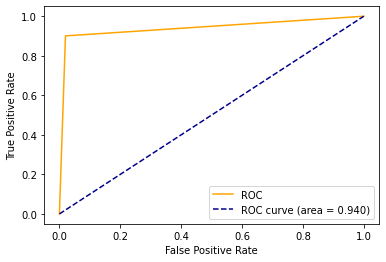

In [101]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### from the above we get all the metrics of the currently trained model.
### put fraud_reported column and predicted fraud_reported column side by side to observe the diff between these two columns

In [102]:
y_pred=model.predict(newdf)
data=dff.drop(['fraud_reported'],axis=1)
data['Pred']=y_pred
data['fraud_reported']=dff[['fraud_reported']]
data

,months_as_customer,policy_state,policy_csl,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,capital-gains,incident_type,incident_severity,...,property_damage,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,Pred,fraud_reported
2,134,0,1,1413.14,430632,1,2,35100,2,1,...,1,3,34650,7700,3850,23100,2,2007,1,1
4,228,2,2,1583.91,610706,2,2,66000,1,1,...,1,1,6500,1300,650,4550,4,2009,1,1
6,137,1,0,1333.35,441716,1,5,0,2,1,...,1,0,78650,21450,7150,50050,5,2012,1,1
7,165,2,1,1137.03,603195,2,4,0,2,2,...,1,2,51590,9380,9380,32830,6,2015,1,1
8,27,2,1,1442.99,601734,1,6,0,0,2,...,1,1,27700,2770,2770,22160,7,2012,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,283,0,1,1195.01,476227,2,2,60700,2,0,...,1,2,42700,0,6100,36600,1,2011,0,0
143,22,1,0,1238.62,463993,0,8,0,0,0,...,0,3,70800,7080,14160,49560,4,2012,0,0
462,448,2,1,1376.16,466555,1,4,38600,2,0,...,1,1,47760,5970,5970,35820,9,2013,0,0
529,15,1,0,1586.41,608708,4,2,33500,0,0,...,0,3,75570,6870,13740,54960,10,2010,0,0


### analyze how similar dist plot are of actual and predicted values

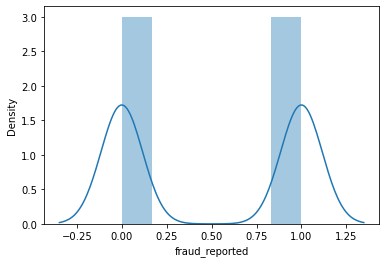

<AxesSubplot:xlabel='Pred', ylabel='Density'>

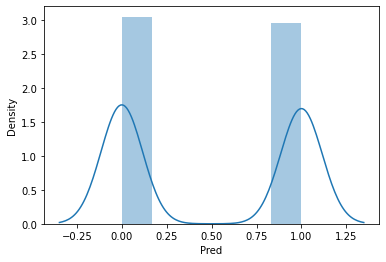

In [103]:
sn.distplot(data['fraud_reported'])
plt.show()
sn.distplot(data['Pred'])

### heatmap of the confusion matrix

<AxesSubplot:>

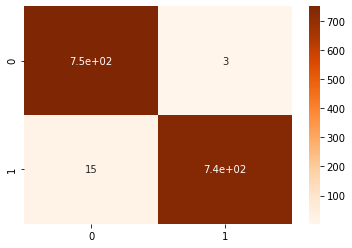

In [104]:
sn.heatmap(confusion_matrix(data['fraud_reported'],data['Pred']),annot=True,cmap="Oranges",xticklabels=model.classes_
               ,yticklabels=model.classes_)

### 15 False positive are detected
### 3 True negative are detected
### Save model

In [105]:
joblib.dump(model, 'Insurance.pkl')

['Insurance.pkl']